In [1]:
!pip install tweepy python-dotenv japanize_matplotlib

1. こちらにアクセスしてデータをアプリを作成する：https://developer.twitter.com/en/apps
2. 

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
import tweepy
import os

client = tweepy.Client(bearer_token=os.getenv("bearer_token"),
                    consumer_key=os.getenv("api_key"),
                    consumer_secret = os.getenv("api_key_secret"),
                    access_token=os.getenv("access_token"), 
                    access_token_secret=os.getenv("access_token_secret"),
                    wait_on_rate_limit=True)


In [4]:
def get_hashtags(tweet):
    hashtags = []
    if 'hashtags' in tweet.entities:
        for hashtag in tweet.entities['hashtags']:
            hashtags.append(hashtag['tag'])
    return list(set(hashtags))


In [6]:
query = 'lang:ja #駆け出しエンジニアと繋がりたい -is:retweet'
tweets = tweepy.Paginator(client.search_recent_tweets, 
                              query=query,
                              tweet_fields=['entities', 'context_annotations', 'created_at'],
                              max_results=100).flatten(limit=1000)
hash_tags_per_tweet = []
for tweet in tweets:
    hash_tags_per_tweet.append(get_hashtags(tweet))

In [7]:
import itertools
hash_tags = list(itertools.chain(*hash_tags_per_tweet))

In [8]:
from collections import Counter
counted_list = Counter(hash_tags).most_common(31)

In [9]:
Counter(hash_tags).most_common(31)

[('駆け出しエンジニアと繋がりたい', 1000),
 ('プログラミング初心者', 191),
 ('今日の積み上げ', 176),
 ('プログラミング', 89),
 ('プログラミング初心者と繋がりたい', 77),
 ('Progate', 45),
 ('エンジニア', 43),
 ('エンジニアと繋がりたい', 43),
 ('プログラミング初学者', 40),
 ('Web制作', 31),
 ('エンジニア転職', 31),
 ('web制作', 30),
 ('朝活', 29),
 ('駆け出しエンジニア', 29),
 ('デイトラ', 23),
 ('プログラミング学習', 22),
 ('駆け出しwebデザイナーと繋がりたい', 20),
 ('副業', 20),
 ('フリーランス', 18),
 ('仮想通貨', 18),
 ('webデザイン', 18),
 ('ブログ', 17),
 ('webデザイン勉強中', 17),
 ('Python', 17),
 ('WEB制作', 16),
 ('リップル', 14),
 ('WEBデザイン', 13),
 ('駆け出しWebデザイナーとつながりたい', 13),
 ('IOST', 13),
 ('プログラミング勉強中', 12),
 ('Webデザイン', 11)]

[Text(0.5, 0, '"駆け出しエンジニアと繋がりたい"と同時に利用された回数')]

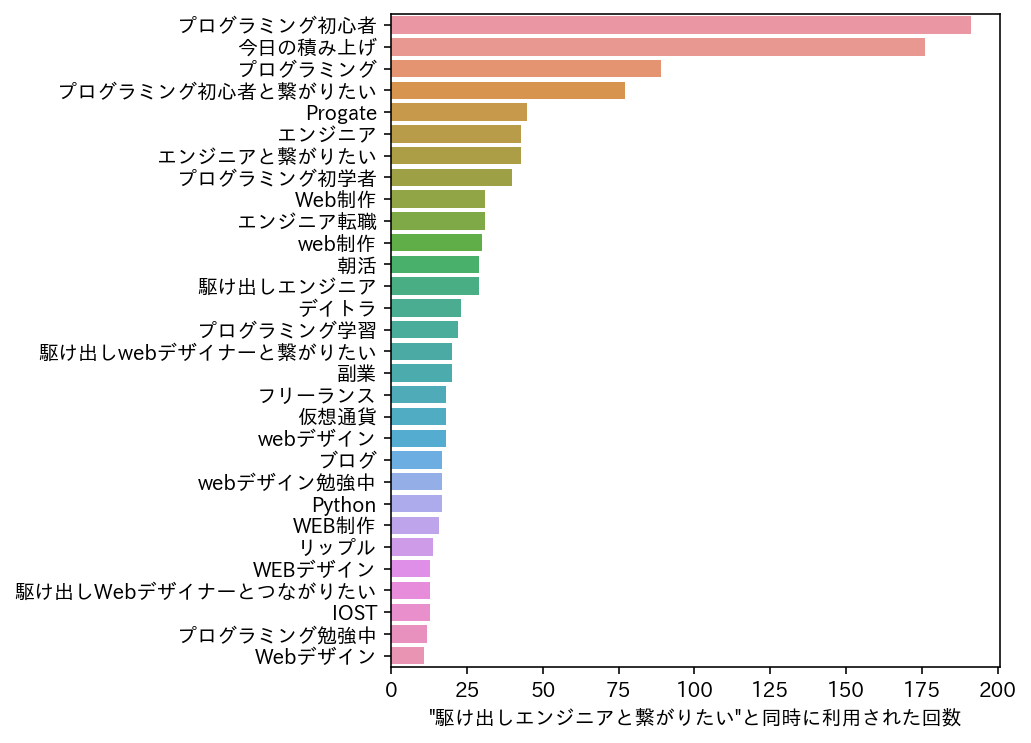

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
import japanize_matplotlib
%config InlineBackend.figure_formats = {'png', 'retina'}
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1) 
sns.barplot(y=[x[0] for x in counted_list[1:]], x=[x[1] for x in counted_list[1:]], ax=ax)
ax.set(xlabel='"駆け出しエンジニアと繋がりたい"と同時に利用された回数')